# Supervised Learning Algorithm Comparison Exercise
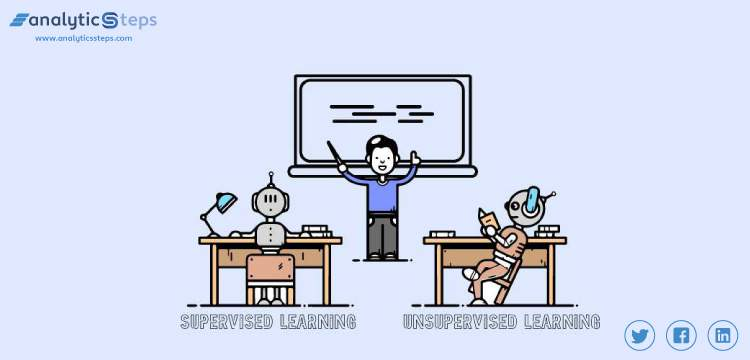

LR: 0.945121 (0.031251)
LDA: 0.947343 (0.036698)
KNN: 0.916570 (0.041193)
CART: 0.934106 (0.021849)
NB: 0.936377 (0.042049)
SVM: 0.626329 (0.004106)


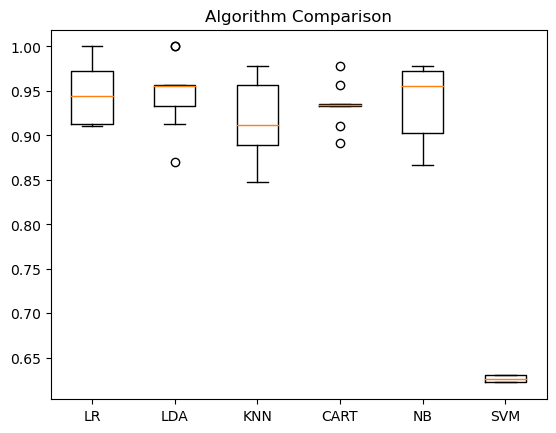

In [1]:
from pandas import read_csv
from matplotlib import pyplot
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
%matplotlib inline

breast_cancer_data = datasets.load_breast_cancer()
# Split-out validation dataset
X_train, X_validation, Y_train, Y_validation = train_test_split(breast_cancer_data.data, breast_cancer_data.target, test_size=0.20, random_state=1, shuffle=True)
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

#### 1. We've already done labs covering KNN and CART (decision tree). In a few sentences, explain each of the other algorithms above (LR, LDA, NB, SVM).

LR refers to logistic regression, and caluculates the probability of an output based on input and is one of the simplest ML algorithms. LDA refers to Linear Discriminant Analysis and projects the classes onto a lower dimensional space and maximizes the distance between the classes to define the difference between them. NB refers to Naive Bayes and calculates a hypothesis h given data d and calculates the probability of a hypothesis occuring using P(h|d) = (P(d|h) * P(h)) / P(d). SVM revers to Support Vector Machine and uses support vectors and hyperplanes to find a line that maximizes the distance between different data points.

#### 2. Rerun supervised learning comparison.

Find another dataset for which we could compare supervised learning techniques. Remember that the dataset must have a single output for which we want to train and build a model. For example, given a bunch of input parameters, would a person likely be granted a loan.

Next, implement the algorithms above for your chosen dataset. Try a few different variants of some of the algorithms. For example, in the kNN algorithm, you could specify a maximum depth. 


              precision    recall  f1-score   support

           e       1.00      1.00      1.00       851
           p       1.00      1.00      1.00       774

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

[[851   0]
 [  0 774]]


[Text(0.5625, 0.9375, 'x[22] <= 0.5\ngini = 0.499\nsamples = 6499\nvalue = [3357, 3142]'),
 Text(0.3125, 0.8125, 'x[42] <= 0.5\ngini = 0.281\nsamples = 3667\nvalue = [619, 3048]'),
 Text(0.1875, 0.6875, 'x[44] <= 0.5\ngini = 0.129\nsamples = 3245\nvalue = [225, 3020]'),
 Text(0.125, 0.5625, 'x[27] <= 0.5\ngini = 0.047\nsamples = 3095\nvalue = [75, 3020]'),
 Text(0.0625, 0.4375, 'gini = 0.0\nsamples = 2946\nvalue = [0, 2946]'),
 Text(0.1875, 0.4375, 'x[17] <= 0.5\ngini = 0.5\nsamples = 149\nvalue = [75, 74]'),
 Text(0.125, 0.3125, 'gini = 0.0\nsamples = 74\nvalue = [0, 74]'),
 Text(0.25, 0.3125, 'gini = 0.0\nsamples = 75\nvalue = [75, 0]'),
 Text(0.25, 0.5625, 'gini = 0.0\nsamples = 150\nvalue = [150, 0]'),
 Text(0.4375, 0.6875, 'x[50] <= 0.5\ngini = 0.124\nsamples = 422\nvalue = [394, 28]'),
 Text(0.375, 0.5625, 'gini = 0.0\nsamples = 394\nvalue = [394, 0]'),
 Text(0.5, 0.5625, 'gini = 0.0\nsamples = 28\nvalue = [0, 28]'),
 Text(0.8125, 0.8125, 'x[80] <= 0.5\ngini = 0.064\nsamples = 28

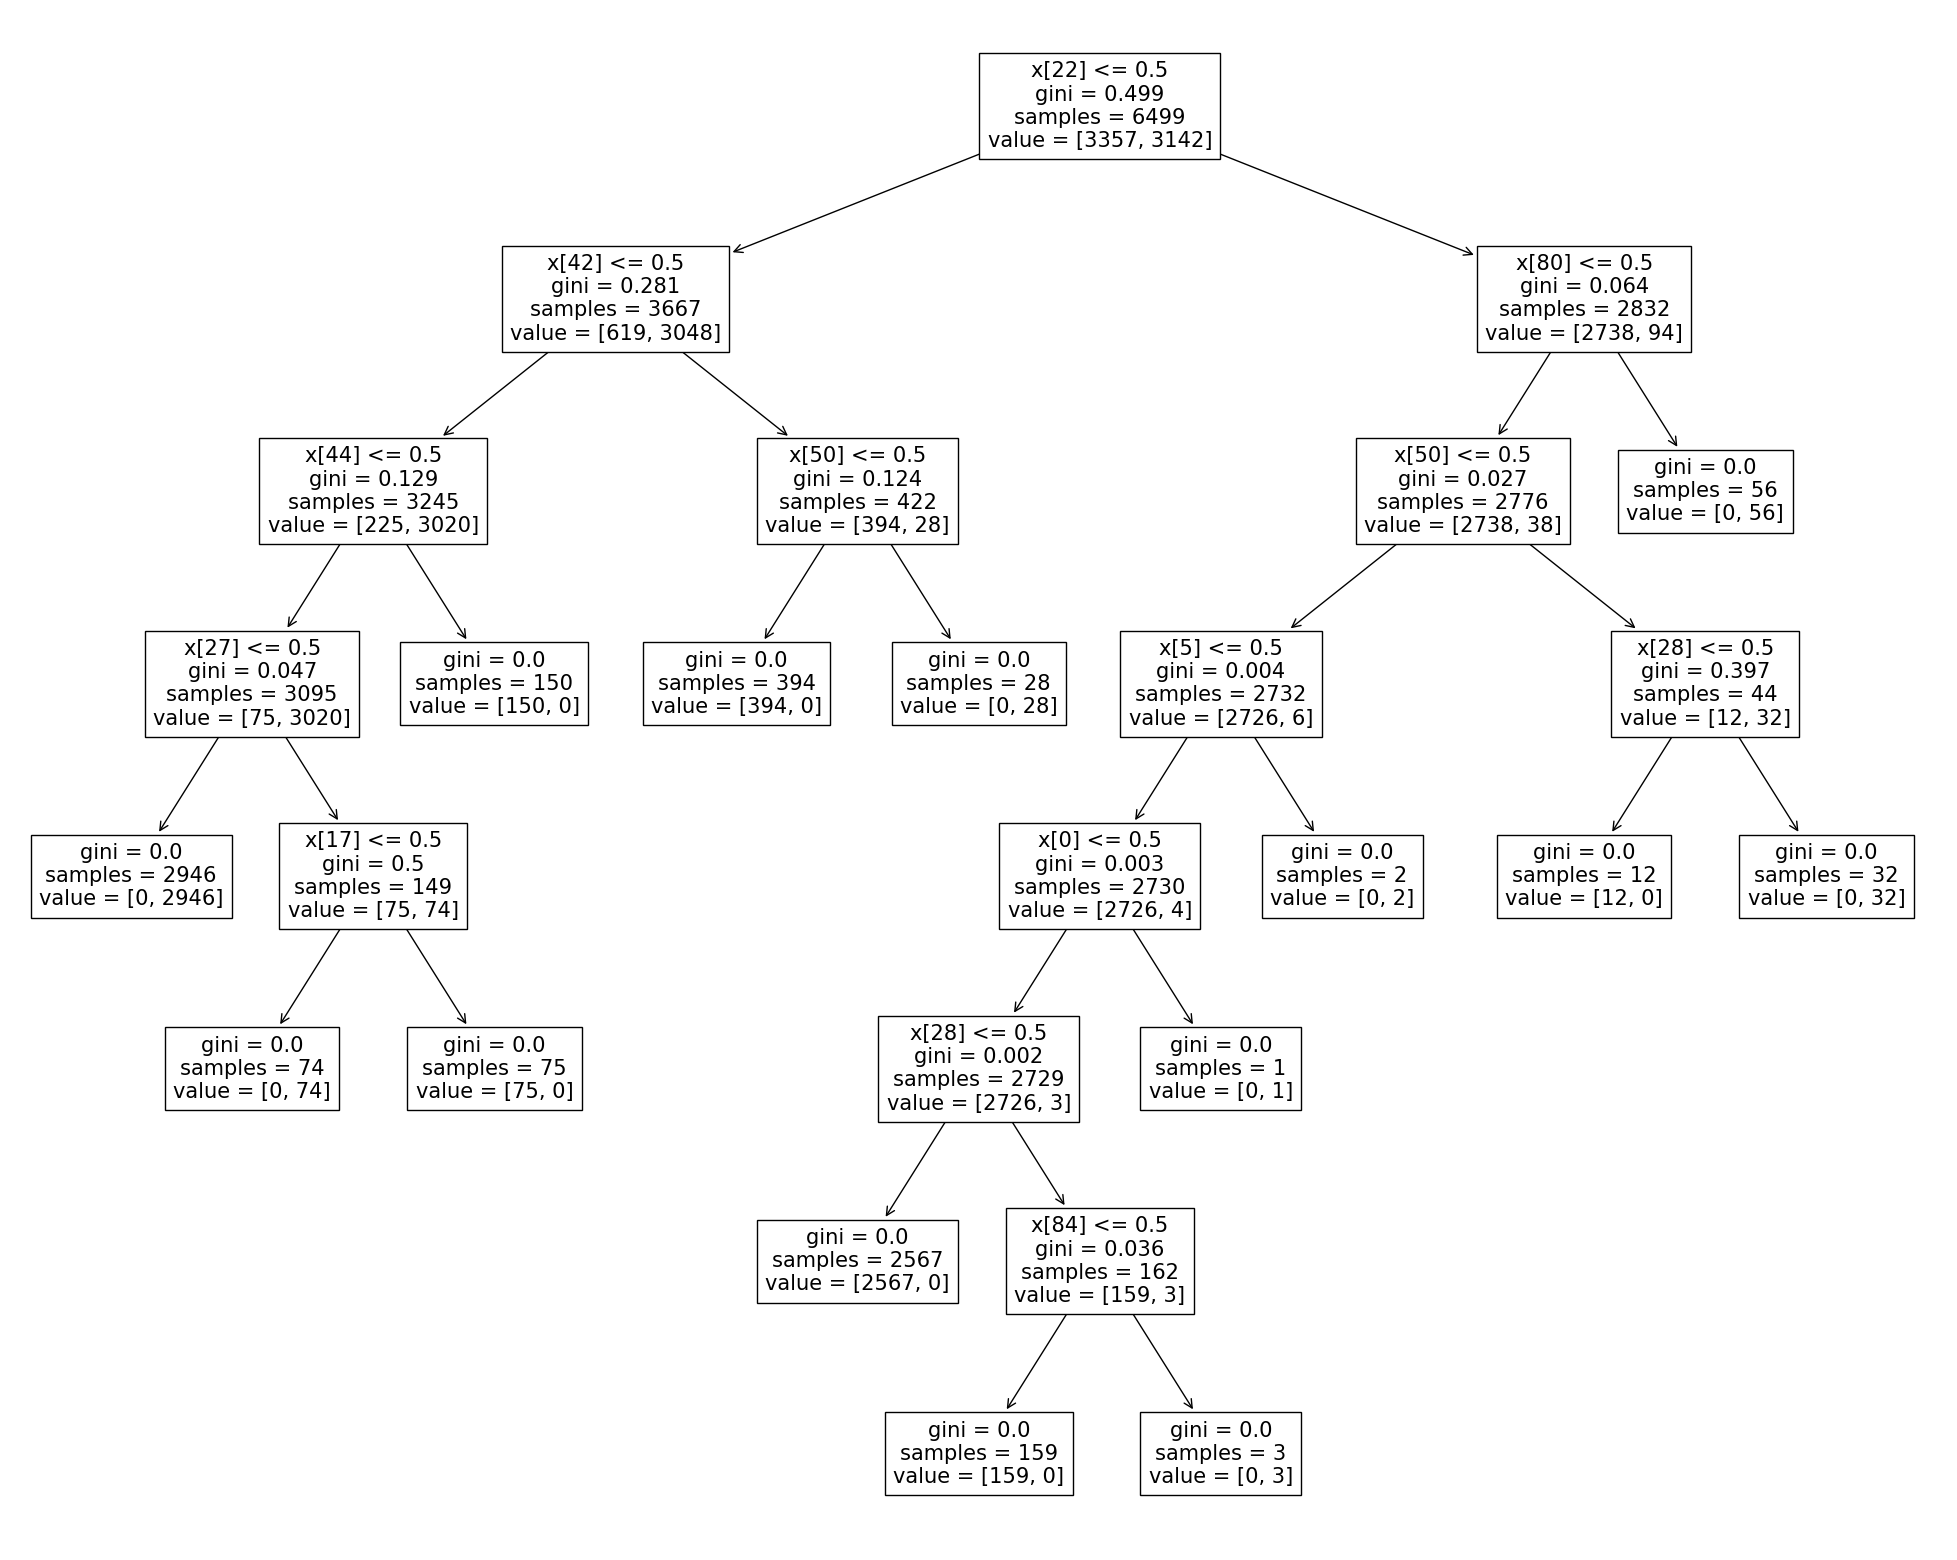

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

dtree = DecisionTreeClassifier()

df = pd.read_csv('mushrooms.csv')
cat_feats = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 
                'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
                'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring',
                'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 
                'spore-print-color', 'population', 'habitat']
final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)

x = final_data.drop('class', axis=1)
y = final_data['class']


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=489)
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

from matplotlib import pyplot as plt
import sklearn.tree
fig = plt.figure(figsize=(25,20))
sklearn.tree.plot_tree(dtree)

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


scaler = StandardScaler()
training_data = scaler.fit_transform(X_train)
validation_data = scaler.transform(X_test)

for k in range(1, 101):
    classifier = KNeighborsClassifier(n_neighbors= k)
    classifier.fit(training_data, y_train)
    cv_scores = cross_val_score(classifier, x, y, cv=5)
    highest_score = 0
    if np.mean(cv_scores) > highest_score:
        highest_score = np.mean(cv_scores)
    cv_scores = cross_val_score(classifier, x, y, cv=10)
    if np.mean(cv_scores) > highest_score:
        highest_score = np.mean(cv_scores)
print(highest_score)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 140, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py", line 246, in predict
    if s

0


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 140, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py", line 246, in predict
    if s

#### 3. How do the results compare? Was there an algorithm that consistently outperformed or underperformed?


The decision tree worked incredibly well with a 100% success rate for some reason. KNN would not run.